-3.9101704524890852
-3.9454589675016454
4.334988095943103
-6.552738266110838


/Users/ciprian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


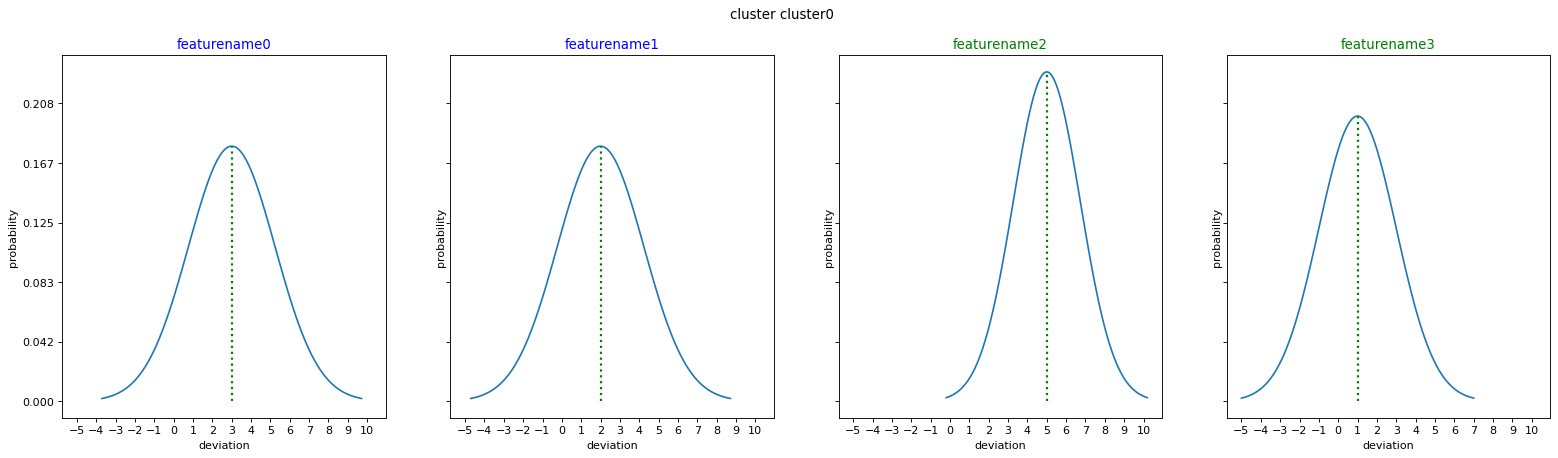

In [3]:
# Work plan:
# For each user either an Agent or an offline data agent gathered set:
    # PRovide e metric to understand for each type of cluster,
    # how attributes and cateogories contributed to that final cluster results

# In 2 weeks - visualisation for offline data
# Another 2 weeks - Step by step explanation for the sequence of questions generated by the AI

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import sys

sys.path.append("/Users/ciprian/Work/vortexplore.AI/AI")
from DataDefinitions import *

class ClusterPlotterHelp:
    def __init__(self, clusterName, outputFilePath, numFeatures):
        self.clusterName = clusterName
        self.outputFilePath = outputFilePath

        self.numFeatures = numFeatures

    def plotClusterFeature(self, axisToDrawOn, featureName, featureMean, featureDev, isCategory):
        font1 = {'family':'serif','color': 'blue' if isCategory is True else 'Green','size':14}
        font2 = {'family':'serif','color':'black','size':10}

        axisToDrawOn.set_title(featureName, color= 'blue' if isCategory else 'green')
        axisToDrawOn.set(xlabel="Dev", ylabel="Prob")
        #print(x_labels)
        #axisToDrawOn.set_xticks(x_labels)
        #plt.xticks(x_labels)
        #print(plt.xticks())
        #axisToDrawOn.set_xticklabels(x_labels, rotation=90)

        self.featureName = featureName
        self.featureMean = featureMean

        self.sigma = math.sqrt(featureDev)
        x = np.linspace(featureMean - 3*self.sigma, self.featureMean + 3*self.sigma, 100)
        axisToDrawOn.plot(x, stats.norm.pdf(x, self.featureMean, self.sigma))
        self.gaussianDist = stats.norm(self.featureMean, self.sigma)


        xdrawmean = self.featureMean
        ydrawmean = self.gaussianDist.pdf(xdrawmean)
        axisToDrawOn.vlines(x=xdrawmean, ymin=0, ymax=ydrawmean, colors='green', ls=':', lw=2)

    def plotUserDeviationOnGraph(self, devValue):
        yProbValue = self.gaussianDist.pdf(devValue)

        # single vline with specific ymin and ymax
        plt.vlines(x=devValue, ymin=0, ymax=devValue, colors='red', ls=':', lw=2) # label=f'Score for {self.featureName}={y}')
        plt.legend()

    def plotCluster(self):
        fig = plt.figure(figsize=(24, 6), dpi=80)
        gs = fig.add_gridspec(1, self.numFeatures, hspace=0.2, wspace=0.2)
        axs = gs.subplots(sharey='row', sharex='row')

        x_labels = list(range(int(-2*MAX_QUESTION_RESPONSE), int(2*MAX_QUESTION_RESPONSE)))
        y_labels = list(np.linspace(start=0.0, stop =1.0, num = 25))
        for ax in axs:
            plt.sca(ax)
            plt.xticks(x_labels, color='black')
            plt.yticks(y_labels, color='black')

        fig.suptitle(f"cluster {self.clusterName}")

        randomMeans = np.random.randint(size=[self.numFeatures], low=MIN_QUESTION_RESPONSE, high=MAX_QUESTION_RESPONSE)
        randomDevs = np.random.randint(size=[self.numFeatures], low=MIN_QUESTION_RESPONSE, high=MAX_QUESTION_RESPONSE)

        for clusterIndex in range(self.numFeatures):
            self.plotClusterFeature(axs[clusterIndex], f"featurename{clusterIndex}",
                                    featureMean=randomMeans[clusterIndex],
                                    featureDev=randomDevs[clusterIndex],
                                    isCategory=clusterIndex<self.numFeatures/2)

            intervalLength = (MAX_QUESTION_RESPONSE - MIN_QUESTION_RESPONSE + 1)
            userRandomDevValue = ((np.random.rand() * (2 * intervalLength)) - intervalLength) + (MIN_QUESTION_RESPONSE - 1)
            print(userRandomDevValue)
            #self.plotUserDeviationOnGraph(axs[clusterIndex], devValue=userRandomDevValue)

        #ax1.plot(x, y)
        #ax2.plot(x, y**2, 'tab:orange')
        #ax3.plot(x + 1, -y, 'tab:green')
        #ax4.plot(x + 2, -y**2, 'tab:red')

        for ax in axs.flat:
            ax.set(xlabel='deviation', ylabel='probability')

        fig.show()

clusterPlortterHelper = ClusterPlotterHelp("cluster0", "fig.png", 4)
clusterPlortterHelper.plotCluster()